# 🧹 Data Preparation Pipeline: NYC Airbnb Market
**Author:** Hanna Kovalenko  
**Tool:** Python (Pandas)  
**Next Step:** Visualization in Tableau

## 📌 Notebook Overview
This notebook covers the **Data Cleaning & Pre-processing** phase of the project. 
The goal is to transform the raw "dirty" dataset into a clean, structured format suitable for Business Intelligence (BI) analysis.

## ⚙️ Key Steps Performed
1.  **Data Audit:** Checking for duplicates, missing values, and data type inconsistencies.
2.  **Data Cleaning:** 
    *   Handling missing values in `reviews_per_month` and `names`.
    *   Converting `last_review` to datetime format.
3.  **Outlier Management:** 
    *   Applied **Winsorization (99th percentile)** to cap extreme prices (>$799).
    *   Filtered out unrealistic `minimum_nights` values.
4.  **Export:** Saving the clean dataset as `airbnb_clean.csv` for further analysis in Tableau.

**Data Source:** [New York City Airbnb Open Data on Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we observe some missing values in colamns `name` and `host_name`. I'm going to raplace them with 'Unknown' value.

And a great number of missing values in columns `last_review` and `reviews_per_month`. These are listings that don't have reviews yet.
i'm also going to transform typy of data in colamn `last_review` to datetime.

In [4]:
df['host_name'] = df['host_name'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [5]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


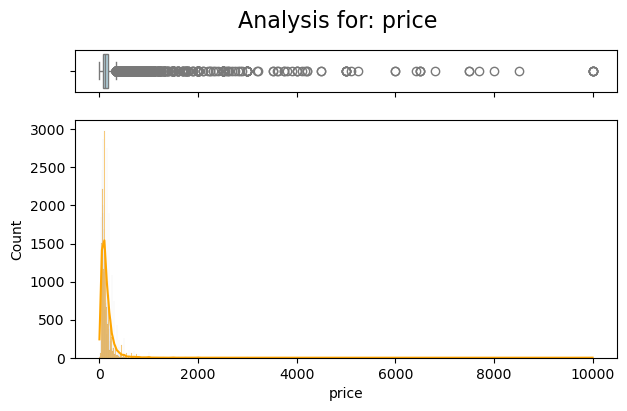

--------------------------------------------------


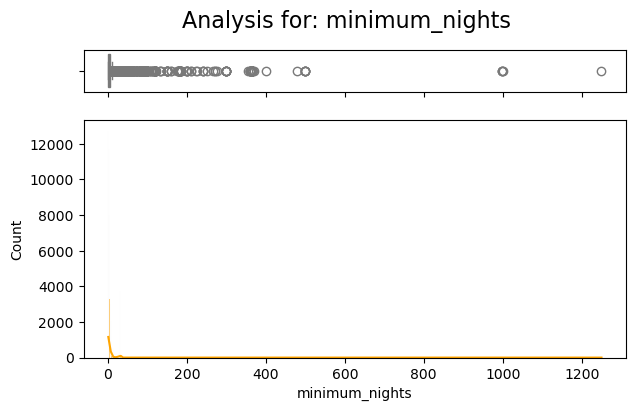

--------------------------------------------------


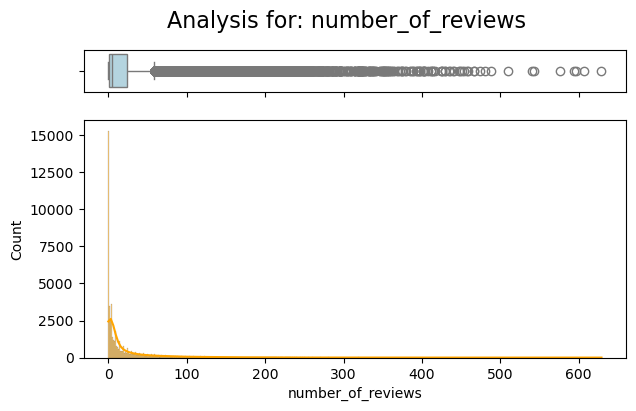

--------------------------------------------------


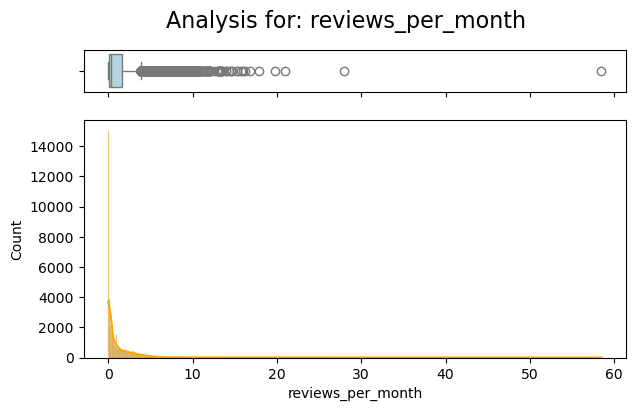

--------------------------------------------------


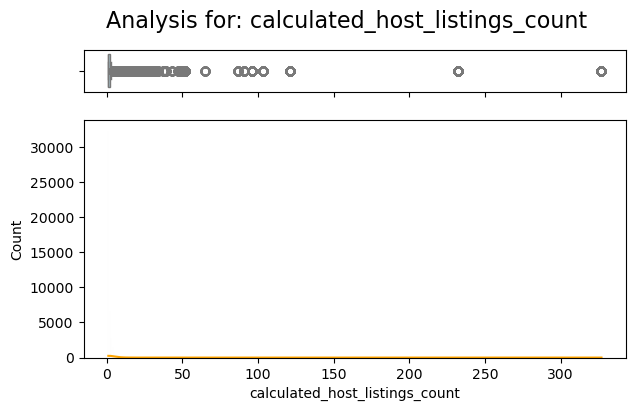

--------------------------------------------------


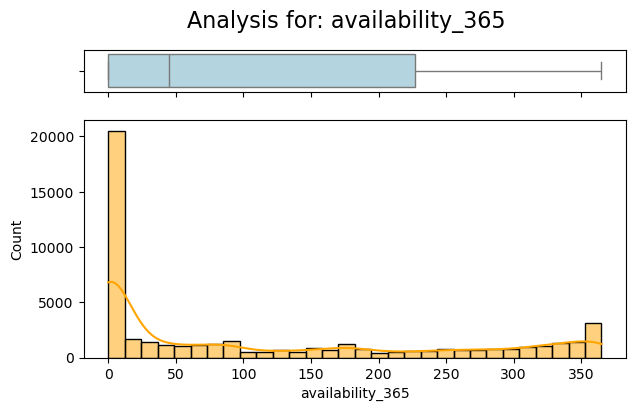

--------------------------------------------------


In [6]:
columns_to_plot = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

for col in columns_to_plot:
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, 
                                          gridspec_kw={"height_ratios": (.15, .85)}, 
                                          figsize=(7, 4))
    
    fig.suptitle(f"Analysis for: {col}", fontsize=16)

    sns.boxplot(data=df, x=col, ax=ax_box, color='lightblue')
    ax_box.set(xlabel='')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='orange')
    
    plt.show()
    print("-" * 50)

Here we can see a great number of outliers. To handle this problem I impute values > the 95th percentile with the value at the 95th percentile (99th percentil for `price`)

In [7]:
def outlier_imputer(column_name, percentile):
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [12]:
for column in ['minimum_nights','number_of_reviews','reviews_per_month']:
               outlier_imputer(column, 0.95)
outlier_imputer('price', 0.99)   

           minimum_nights | percentile: 0.95 | threshold: 30.0
        number_of_reviews | percentile: 0.95 | threshold: 114.0
        reviews_per_month | percentile: 0.95 | threshold: 4.31
                    price | percentile: 0.99 | threshold: 799.0


In [11]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,143.956233,5.952776,20.107618,1.010997,7.143982,112.781327
std,121.935067,8.674476,31.359829,1.297714,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,799.000000,30.000000,114.000000,4.310000,327.000000,365.000000


In [17]:
df.to_csv('airbnb_clean.csv', index=False)